In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
class Problema:
    @staticmethod
    def f(x):
        return 2 * np.sin(x) - (x**2 / 10)

class DerivadaNumerica:
    def __init__(self, h):
        self.h = h
    
    def df(self, x):
        return (Problema.f(x + self.h) - Problema.f(x)) / self.h

class Plot:
    def __init__(self, largura, altura):
        self.fig, self.ax = plt.subplots(figsize=(largura, altura))

    def plota_curva(self, X, Y, rotulo_curva):
        self.ax.plot(X, Y, label=rotulo_curva)
        self.ax.set_xlabel("x")
        self.ax.set_ylabel("y")
        self.ax.grid(alpha=0.25)
        self.ax.legend()

class MetodosUnidimIntervalo:
    def __init__(self, a, b, tol, n_iter):
        self.a = a
        self.b = b
        self.tol = tol
        self.n_iter = n_iter
    
    def secao_aurea(self):
        R = (np.sqrt(5) - 1) / 2

        iter = 0
        erro = self.tol + 1.0

        while erro > self.tol and iter < self.n_iter:
            d = R * (self.b - self.a)

            x1 = self.a + d
            x2 = self.b - d

            if Problema.f(x1) > Problema.f(x2):
                self.a = x2
                x2 = x1
                d = R * (self.b - self.a)
                x1 = self.a + d
            else:
                self.b = x1
                x1 = x2
                d = R * (self.b - self.a)
                x2 = self.b - d
            
            erro = np.abs(self.b - self.a)
            iter += 1
        return (self.a + self.b) / 2.0
    
    def busca_bissecao(self):
        k = 1
        erro = self.tol + 1.0
        df_driver = DerivadaNumerica(h=1e-6)
        while erro > self.tol and k < self.n_iter:
            lambdaa = (self.a + self.b) / 2
            if df_driver.df(lambdaa) == 0:
                return lambdaa
            elif df_driver.df(lambdaa) > 0:
                self.b = lambdaa
            else:
                self.a = lambdaa
            erro = np.abs(self.b - self.a)
            k += 1
        return lambdaa

1.4275517496337753 1.4275517496337753


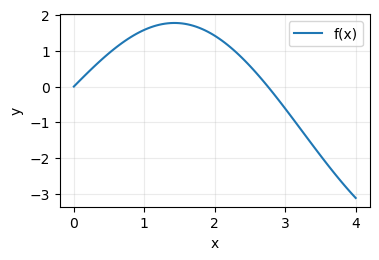

In [ ]:
a, b = 0.0, 4.0

driver_metodos_unid_int = MetodosUnidimIntervalo(a=a, b=b, tol=1e-6, n_iter=100)
sol_sa = driver_metodos_unid_int.secao_aurea()
sol_bb = driver_metodos_unid_int.busca_bissecao()

# print(sol_sa, sol_bb)

X = np.linspace(a, b, 100)
Y = Problema.f(X)
driver_plot = Plot(largura=4.0, altura=2.5)
driver_plot.plota_curva(X, Y, rotulo_curva="f(x)")